In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [223]:
df = pd.read_csv('Data_1.csv')

In [224]:
x = df.time.values*60
y = df.preasure.values*0.01
x = x + 20

In [225]:
import math

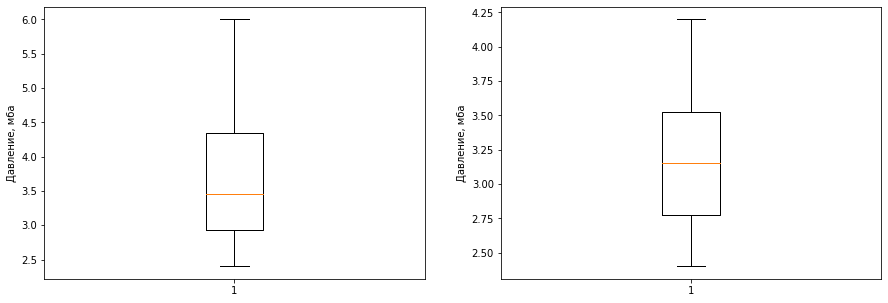

In [242]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.boxplot(y)
ax2.boxplot(y[6:])
ax1.set_ylabel('Давление, мба')
ax2.set_ylabel('Давление, мба')

plt.savefig('Lab1_0.eps', format='eps')

In [243]:
ax.set_title('Зависимость скорости откачка от времени в камере(Thyracont)')
ax.set_xlabel("Время(с)")
ax.set_ylabel("Давление в камере(мбар)")
ax.set_xlim([400,800])
ax.set_ylim([10 ** (-3), 0.01])
ax.plot(x_1, y_1, '-o')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6d60609700>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6d606b60a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6d60609ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6d606b6d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6d606b63d0>],
 'means': []}

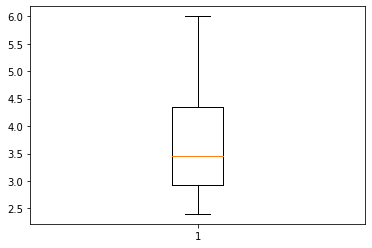

In [244]:
plt.boxplot(y)



In [245]:
x = x[6:]
y = y[6:]

In [246]:
y = y*100000

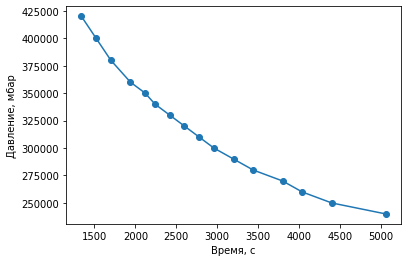

In [247]:
plt.plot(x, y, "o-")
#plt.title('Зависимость давления от времени откачки в камере (с ПМТ-2)')
plt.xlabel("Время, с")
plt.ylabel("Давление, мбар")
plt.savefig('Lab1_1.eps', format='eps')

In [248]:
import lmfit

In [249]:
mod = lmfit.models.ExponentialModel()
pars = mod.guess(y, x)
out = mod.fit(y, pars, x=x)

In [250]:
print(out.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 16
    # variables        = 2
    chi-square         = 1.2923e+09
    reduced chi-square = 92309697.6
    Akaike info crit   = 295.314054
    Bayesian info crit = 296.859231
[[Variables]]
    amplitude:  499715.355 +/- 10643.1893 (2.13%) (init = 486657.5)
    decay:      6135.50827 +/- 297.571911 (4.85%) (init = 6524.927)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.937


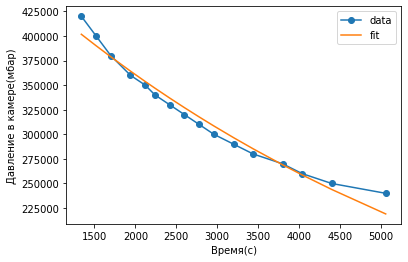

In [275]:
#plt.title('Зависимость давления от времени откачки в камере (с ПМТ-2)')
plt.xlabel("Время(с)")
plt.ylabel("Давление в камере(мбар)")
plt.plot(x, y, '-o', label = "data")
plt.plot(x, out.best_fit, label = "fit")
plt.legend()
plt.savefig('Lab1_1.png', format='png')

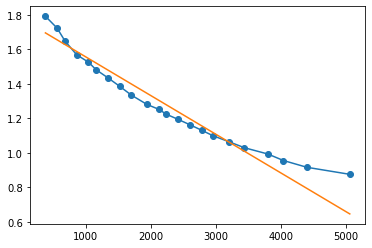

In [236]:

plt.plot(x, np.log(y), '-o')
plt.plot(x, np.log(out.best_fit))
plt.show()

Text(0, 0.5, 'Давление в камере(мбар)')

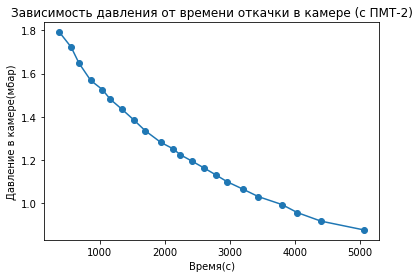

In [16]:
plt.plot(x, np.log(y), "o-")
plt.title('Зависимость давления от времени откачки в камере (с ПМТ-2)')
plt.xlabel("Время(с)")
plt.ylabel("Давление в камере(мбар)")


In [ ]:
LinearModel

In [ ]:
mod = lmfit.models.ExponentialModel()
pars = mod.guess(y_1, x_1)
out = mod.fit(y_1, pars, x=x_1)

In [ ]:
print(out.fit_report())

In [ ]:
plt.plot(x_1, y_1, '-o')
plt.plot(x_1, out.best_fit)
plt.show()

In [17]:
import statsmodels.api as sm
x_log = x
y_log = np.log(y)

In [18]:
x_log = sm.add_constant(x_log)

In [19]:
model = sm.OLS(y_log, x_log).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     319.4
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           9.13e-14
Time:                        17:32:13   Log-Likelihood:                 29.554
No. Observations:                  22   AIC:                            -55.11
Df Residuals:                      20   BIC:                            -52.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7234      0.029     59.983      0.0

In [21]:
k = -0.0002
b =  1.7234

Text(0, 0.5, 'Давление в камере(мбар)')

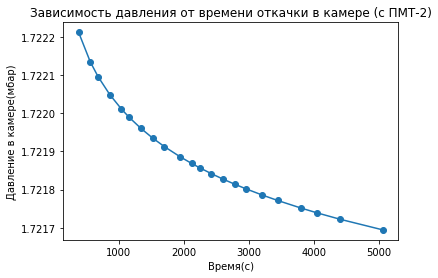

In [22]:
plt.plot(x, k*np.log(x)+b, "o-")
#plt.plot(x, np.log(y), "o-")
plt.title('Зависимость давления от времени откачки в камере (с ПМТ-2)')
plt.xlabel("Время(с)")
plt.ylabel("Давление в камере(мбар)")

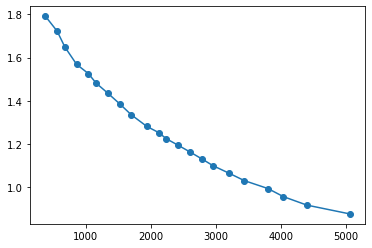

In [23]:
plt.plot(x, np.log(y), "o-")

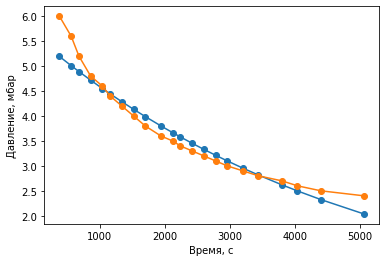

In [219]:
plt.plot(x, np.exp(b)*np.exp(k*x), "o-")
plt.plot(x, y, "o-")
#plt.title('Зависимость давления от времени откачки в камере (с ПМТ-2)')
plt.xlabel("Время, с")
plt.ylabel("Давление, мбар")
plt.savefig('Lab1_1.eps', format='eps')

In [25]:
np.exp(-7.4064)

0.0006073532352515259

eval_env: 1


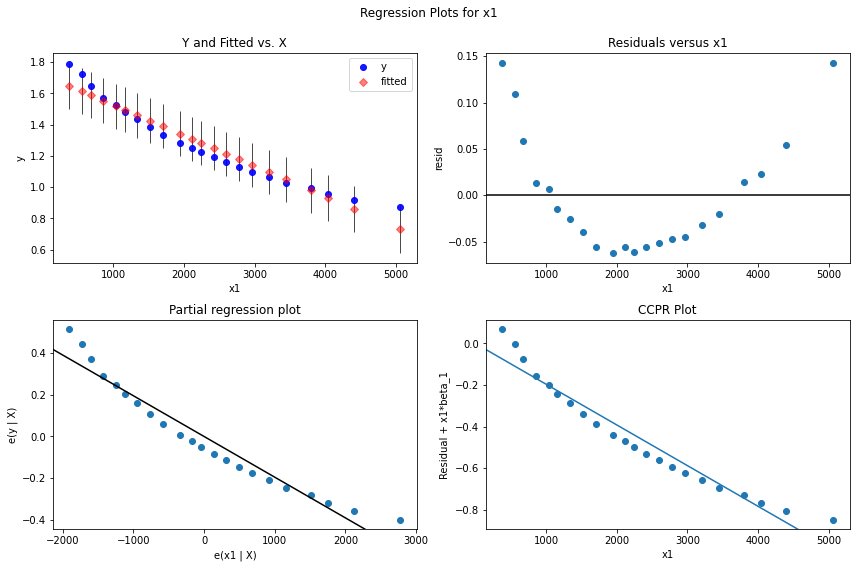

In [279]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x1', fig=fig)
plt.savefig('Lab1_1_1.png', format='png')

In [27]:
res = model.resid

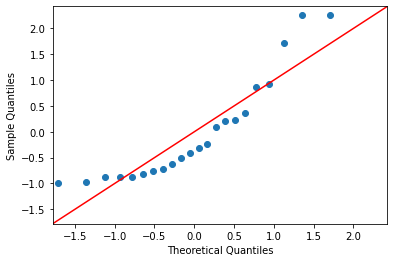

In [28]:
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

In [281]:
y_2 = -(y/x)*np.log(y/y[0])

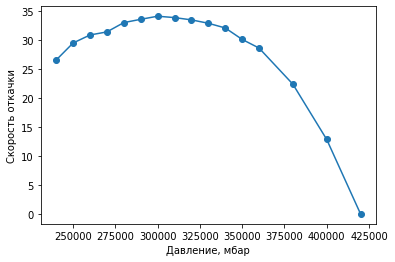

In [282]:
plt.plot(y, y_2, "o-")
#plt.title("Зависимость скорости откачка от давления в камере (ПМТ-2)")
plt.xlabel("Давление, мбар")
#plt.xticks(rotation=45)
#plt.xlim([0.00002, 0.0000603])
#plt.ylim([0.0002, 0.000703])
plt.ylabel(f"Скорость откачки")
plt.savefig('Lab1_2.eps', format='eps')

Text(0, 0.5, 'Скорость откачки')

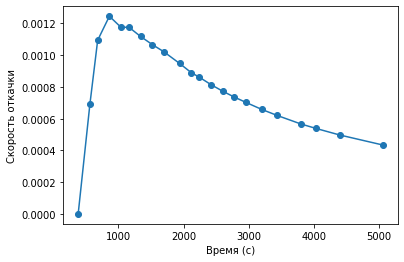

In [155]:
plt.plot(x, y_2, "o-")
#plt.title("Зависимость скорости откачка от времени в камере (ПМТ-2)")
plt.xlabel("Время (с)")
plt.ylabel("Скорость откачки")

In [156]:
df_1 = pd.read_csv('Data_2.2.csv')

In [284]:
x_1 = df_1.x.values
y_1 = df_1.y.values
#x_1

Text(0, 0.5, 'Давление в камере(мбар)')

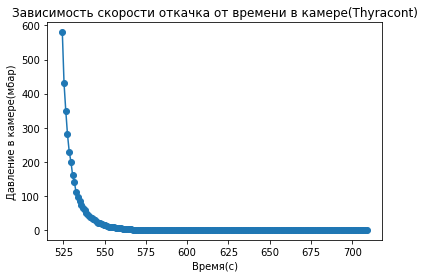

In [285]:
# data from Thyracont
#x_1 = x_1[x_1 > 400]
#x_1 = x_1[x_1 < 800]
plt.plot(x_1, y_1, '-o')
plt.title('Зависимость скорости откачка от времени в камере(Thyracont)')
plt.xlabel("Время(с)")
plt.ylabel("Давление в камере(мбар)")
#plt.ylim([10 ** (-3), 100])
#plt.xlim([400,800])

In [286]:
#plt.plot(x_1, np.log(y_1), '-o')

In [287]:
mod = lmfit.models.ExponentialModel()
pars = mod.guess(y_1, x_1)
out = mod.fit(y_1, pars, x=x_1)

In [288]:
print(out.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1846
    # data points      = 178
    # variables        = 2
    chi-square         = 5837.44043
    reduced chi-square = 33.1672752
    Akaike info crit   = 625.267018
    Bayesian info crit = 631.630585
[[Variables]]
    amplitude:  9.5782e+44 +/- 1.1384e+45 (118.86%) (init = 1.919991e+15)
    decay:      5.39020975 +/- 0.06560379 (1.22%) (init = 15.7904)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -1.000


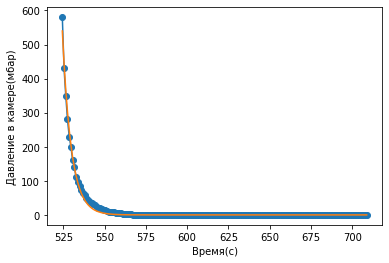

In [292]:
#plt.title('Зависимость скорости откачка от времени в камере(Thyracont)')
plt.xlabel("Время(с)")
plt.ylabel("Давление в камере(мбар)")
plt.plot(x_1, y_1, '-o')
plt.plot(x_1, out.best_fit)
plt.savefig('Lab1_3.eps', format='eps')

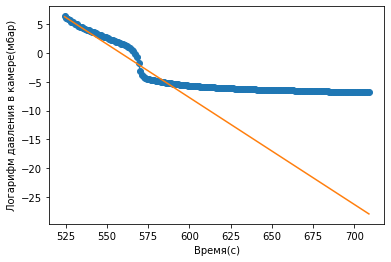

In [294]:
plt.xlabel("Время(с)")
plt.ylabel("Логарифм давления в камере(мбар)")
plt.plot(x_1, np.log(y_1), '-o')
plt.plot(x_1, np.log(out.best_fit))
plt.savefig('Lab1_3.1.eps', format='eps')

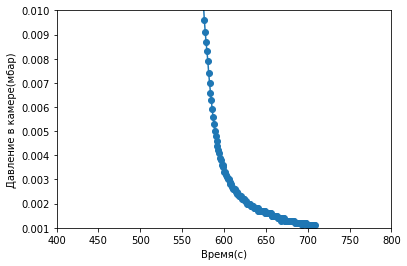

In [300]:


fig = plt.figure()
ax = fig.add_subplot()
#ax.set_title('Зависимость скорости откачка от времени в камере(Thyracont)')
ax.set_xlabel("Время(с)")
ax.set_ylabel("Давление в камере(мбар)")
ax.set_xlim([400,800])
ax.set_ylim([10 ** (-3), 0.01])
ax.plot(x_1, y_1, '-o')
#plt.savefig('Lab1_4.eps', format='eps')

In [301]:
y_3 = -(y_1/x_1)*np.log(y_1/y_1[0])

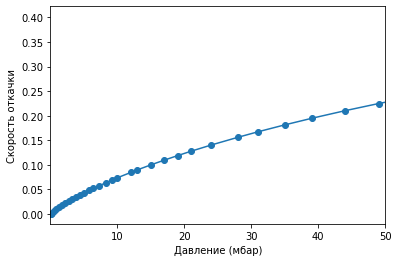

In [302]:
plt.plot(y_1, y_3, '-o')
plt.xlim([10 ** (-2), 50])
#plt.ylim([0,0.01])
#plt.title("Зависимость скорости откачка от давления в камере с датчика Thyracont")
plt.xlabel("Давление (мбар)")
plt.ylabel("Скорость откачки")
plt.savefig('Lab1_5.eps', format='eps')

In [160]:
df_2 = pd.read_csv('Data_3.csv')

In [161]:
df_2 = df_2[7:]

In [162]:
x_4 = df_2.x.values
y_4 = df_2.y.values*10 ** (-2)

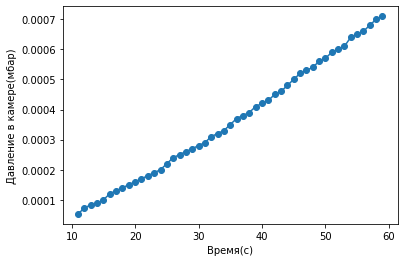

In [303]:
plt.plot(x_4, y_4, "o-")
#plt.title('Зависимость давления от времени натекания в камере (ПМТ-2)')
plt.xlabel("Время(с)")
plt.ylabel("Давление в камере(мбар)")
plt.savefig('Lab1_4.eps', format='eps')

(0.0, 500.0)

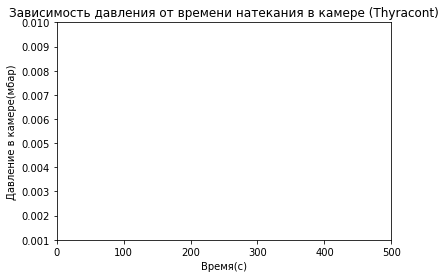

In [164]:
plt.plot(x_1-7200, y_1, '-o')
plt.title('Зависимость давления от времени натекания в камере (Thyracont)')
plt.xlabel("Время(с)")
plt.ylabel("Давление в камере(мбар)")
plt.ylim([10 ** (-3), 0.01])
plt.xlim([7200-7200,7700-7200])

In [170]:
y_5 = -(y_4/x_4)*np.log(y_4/y_4[0])

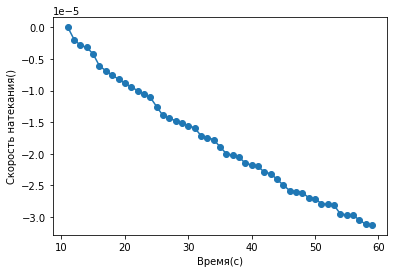

In [304]:
# data from Thyracont
plt.plot(x_4, y_5, '-o')
#plt.title('Зависимость скорости натекания от времени в камере (ПМТ-2)')
plt.xlabel("Время(с)")
plt.ylabel("Скорость натекания()")
#plt.ylim([10 ** (-3), 0.01])
#plt.xlim([0,7000])
plt.savefig('Lab1_6.eps', format='eps')

Text(0, 0.5, 'Скорость натекания')

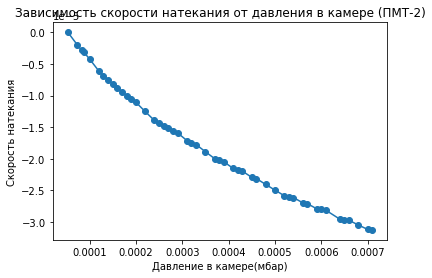

In [172]:
# data from Thyracont
plt.plot(y_4, y_5, '-o')
plt.title('Зависимость скорости натекания от давления в камере (ПМТ-2)')
plt.xlabel("Давление в камере(мбар)")
plt.ylabel("Скорость натекания")
#plt.ylim([10 ** (-3), 0.01])
#plt.xlim([0,7000])

In [60]:
import re

In [125]:
pattern = re.compile(r'[^'' .,*+-'']\d{4,}[^ ]')

s="234533 человека выпили 12,5 л пива 12312312 -> человека выпили 12,5л пива"

def replacer(match):
    return f'{int(match.group()):,}'.replace(',', ' ')

    
re.sub(pattern, replacer, s)

'-234 533 человека выпили 12,5 л пива 12 312 312 -> человека выпили 12,5л пива'

In [82]:
import re

def replacer(match):
    return f'{match.group():,}'.replace(',', ' ')
        

re.sub(r'дождь', replacer, 'шёл дождь и дождь студента') 

<re.Match object; span=(4, 9), match='дождь'>
<re.Match object; span=(12, 17), match='дождь'>


'шёл ДОЖДЬ и ДОЖДЬ студента'

In [96]:
a = '234533'
#a = a[::-1]
#for i in range(len(a)):
#print(a[0:3])

In [99]:
number = 12324
formatted_number = f'{number:,}'.replace(',', ' ')
print(formatted_number)

12 324
